In [63]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
height = [50,90,100,300,400]
weight = [1999,2000,2001,2002,2003]

Text(0.5, 1.0, 'the differance of the years')

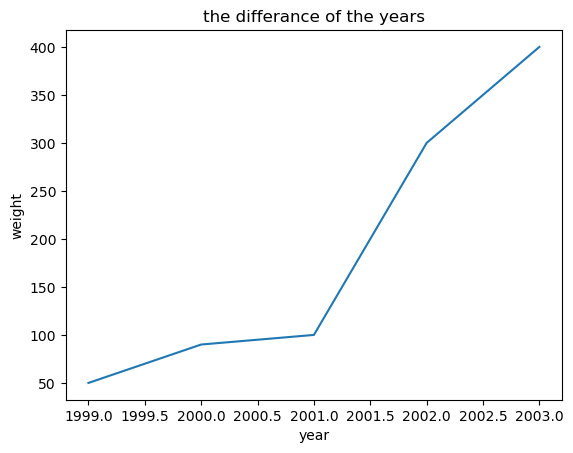

In [16]:
plt.plot(weight, height)
plt.xlabel("year")
plt.ylabel("weight")
plt.title("the differance of the years")

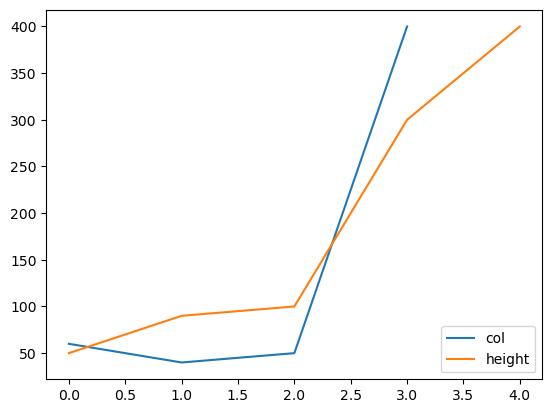

In [27]:
col = [60,40,50,400]
plt.plot(col)
plt.plot(height)

plt.legend(labels = ["col", "height"] , loc="lower right")

([<matplotlib.axis.XTick at 0x1b518614dd0>,
 [Text(0, 0, 'p1'), Text(1, 0, 'p2'), Text(2, 0, 'p3'), Text(3, 0, 'p4')])

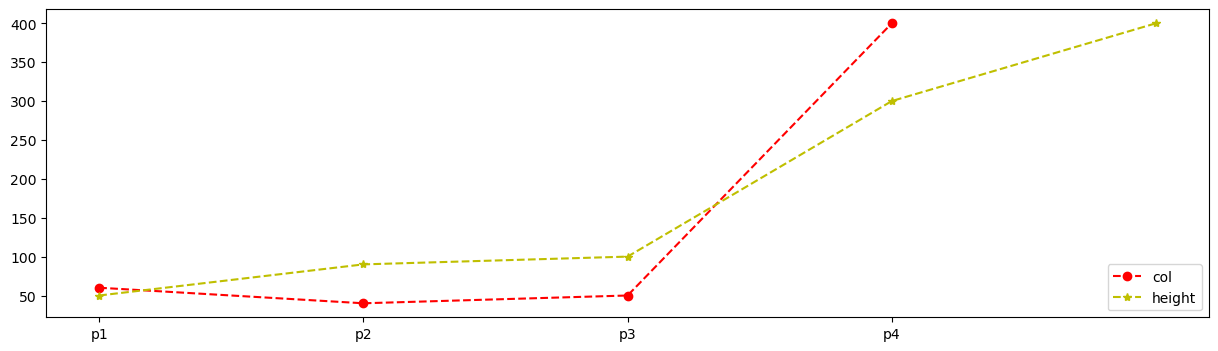

In [40]:
col = [60,40,50,400]
plt.figure(figsize=(15,4))
plt.plot(col, "r--", marker="o")
plt.plot(height ,"y--" ,marker = "*")


plt.legend(labels = ["col", "height"] , loc="lower right")
plt.xticks(ticks=[0,1,2,3], labels=["p1","p2","p3" ,"p4"])

[Text(0, 0, 'p1'), Text(1, 0, 'p2'), Text(2, 0, 'p3'), Text(3, 0, 'p4')]

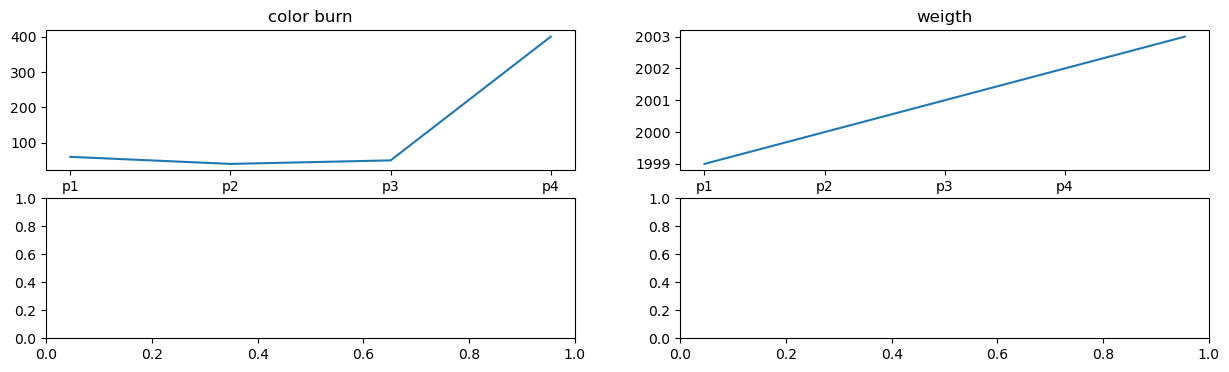

In [51]:
fg, ax = plt.subplots(ncols = 2 ,nrows = 2 ,figsize=(15,4))

ax[0,0].plot(col)
ax[0,1].plot(weight)

ax[0,0].set_title("color burn")
ax[0,1].set_title("weigth")

ax[0,0].set_xticks(ticks=[0,1,2,3])
ax[0,1].set_xticks(ticks=[0,1,2,3])

ax[0,0].set_xticklabels(labels = ["p1","p2","p3","p4"])
ax[0,1].set_xticklabels(labels = ["p1","p2","p3","p4"])

[Text(0, 0, 'p1'), Text(1, 0, 'p2'), Text(2, 0, 'p3'), Text(3, 0, 'p4')]

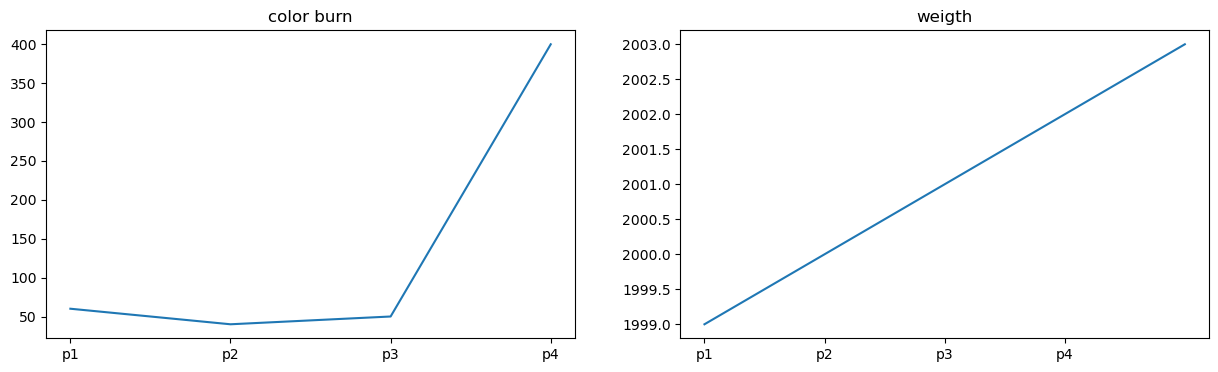

In [61]:
fg, ax = plt.subplots(ncols = 2 ,nrows = 1 ,figsize=(15,4))

ax[0].plot(col)
ax[1].plot(weight)

ax[0].set_title("color burn")
ax[1].set_title("weigth")

ax[0].set_xticks(ticks=[0,1,2,3])
ax[1].set_xticks(ticks=[0,1,2,3])

ax[0].set_xticklabels(labels = ["p1","p2","p3","p4"])
ax[1].set_xticklabels(labels = ["p1","p2","p3","p4"])

# load data

In [64]:
data = pd.read_csv("./bigmart_data.csv")

In [71]:
# data.isna().sum()
data = data.dropna(how = "any")

In [72]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [73]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [88]:
price_item = data.groupby("Item_Type").Item_MRP.mean()[:10]

In [91]:
price_item

Item_Type
Baking Goods             125.795653
Breads                   141.300639
Breakfast                134.090683
Canned                   138.551179
Dairy                    149.481471
Frozen Foods             140.095830
Fruits and Vegetables    145.418257
Hard Drinks              140.102908
Health and Hygiene       131.437324
Household                149.884244
Name: Item_MRP, dtype: float64

In [93]:
index = price_item.index.tolist()
price = price_item.values.tolist()

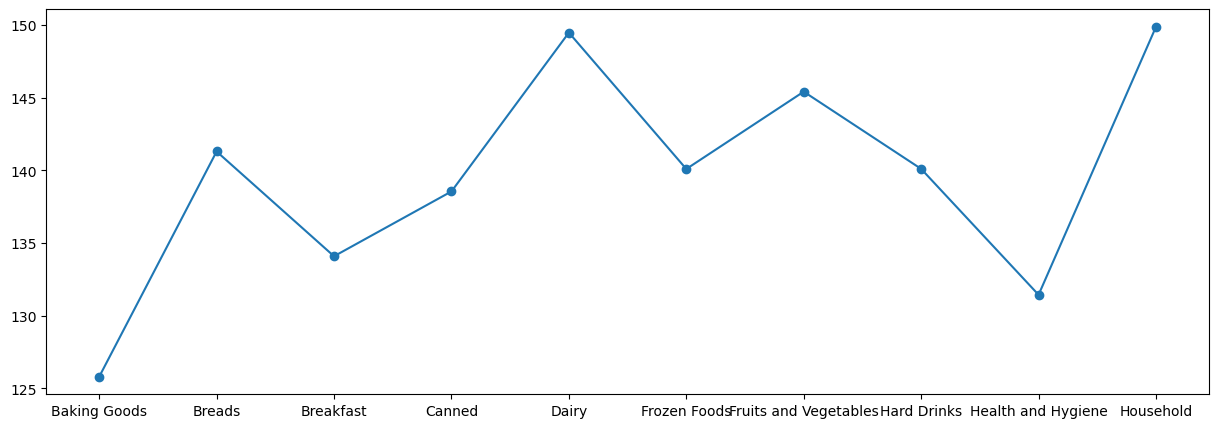

In [97]:
plt.figure(figsize=(15,5))
plt.plot(index,price, marker="o")

In [105]:
sales_by_outlet_size = data.groupby("Outlet_Size").Item_Outlet_Sales.mean()
sales_by_outlet_size.sort_values(inplace= True)

In [106]:
sales_by_outlet_size

Outlet_Size
Medium    2172.116599
High      2298.995256
Small     2358.343066
Name: Item_Outlet_Sales, dtype: float64

In [107]:
index = sales_by_outlet_size.index.tolist()

In [108]:
price = sales_by_outlet_size.values.tolist()

<BarContainer object of 3 artists>

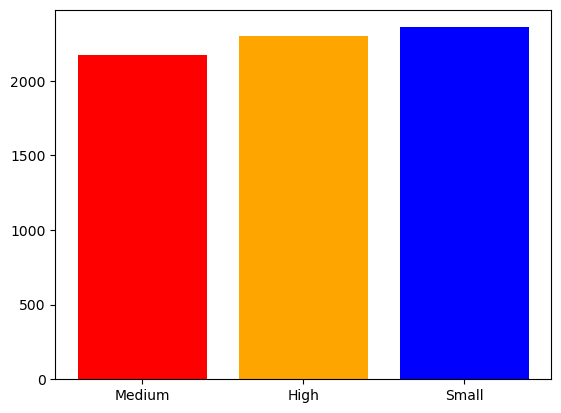

In [109]:
plt.bar(index,price, color=["red", "orange", "blue"])

(array([496., 302., 590., 680., 443., 580., 657., 256., 316., 330.]),
 array([ 31.49   ,  55.02984,  78.56968, 102.10952, 125.64936, 149.1892 ,
        172.72904, 196.26888, 219.80872, 243.34856, 266.8884 ]),
 <BarContainer object of 10 artists>)

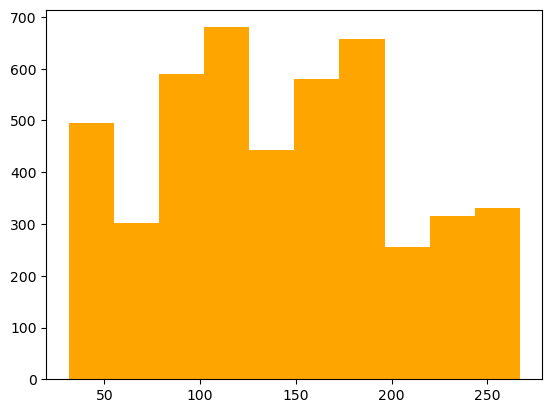

In [117]:
plt.hist(data["Item_MRP"], bins = 10, color="orange")

# boxPlot

In [118]:
boxdata = data[["Item_Outlet_Sales"]]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b525255190>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5252562d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b525254b90>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5252573d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5253b6f50>],
 'means': []}

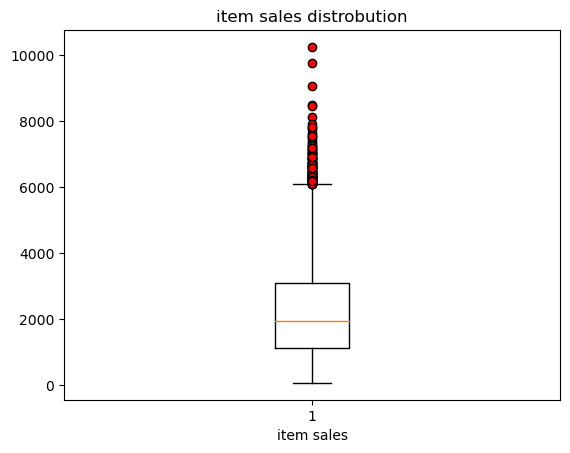

In [126]:
mrk = dict(markerfacecolor = "red", marker="o")
plt.title("item sales distrobution")
plt.xlabel("item sales")
plt.boxplot(boxdata , flierprops = mrk)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1b525183790>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1b52529b310>,
 'cmins': <matplotlib.collections.LineCollection at 0x1b525296f10>,
 'cbars': <matplotlib.collections.LineCollection at 0x1b525296010>}

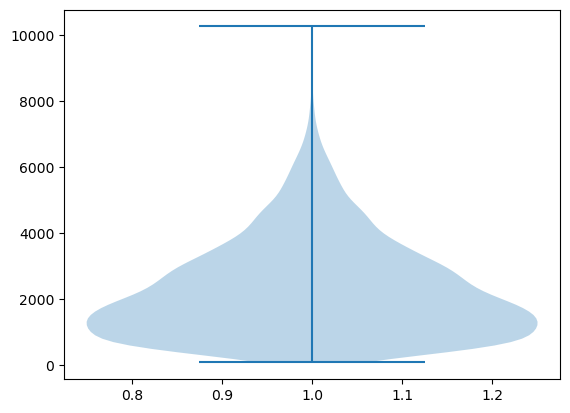

In [128]:
plt.violinplot(boxdata)

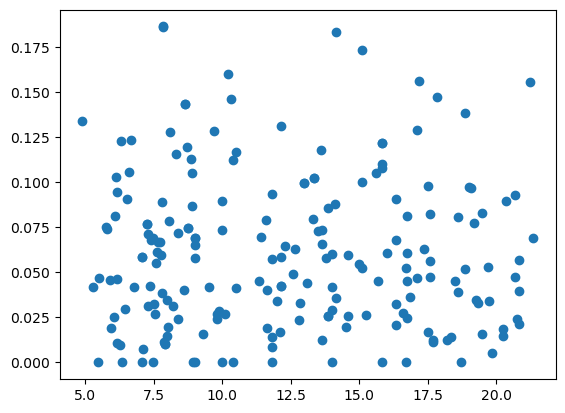

In [130]:
plt.scatter(data['Item_Weight'][:200],data['Item_Visibility'][:200])

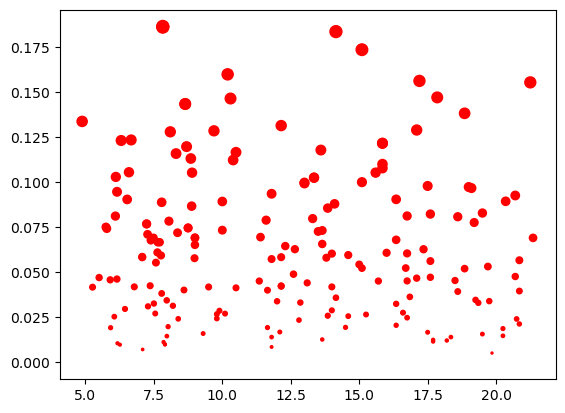

In [135]:
plt.scatter(data['Item_Weight'][:200],data['Item_Visibility'][:200] ,s=data['Item_Visibility'][:200]*400 , c="red")